In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer as vec
from sklearn.svm import LinearSVC
from sklearn.feature_selection import VarianceThreshold
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

# import these modules


from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import cross_val_score
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop_words = stopwords.words('english')
wnl = WordNetLemmatizer()
 
print("rocks :", wnl.lemmatize("killed", pos = 'n'))
print("corpora :", wnl.lemmatize("killing", pos = 'n'))

rocks : killed
corpora : killing


In [11]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print(my_stop_words)

frozenset({'above', 'during', 'as', 'this', 'something', 'de', 'sometimes', 'when', 'hereby', 'part', 'only', 'via', 'whether', 'down', 'becomes', 'us', 'noone', 'fill', 'herself', 'sometime', 'elsewhere', 'ten', 'by', 'whatever', 'until', 'an', 'move', 'i', 'latter', 'rather', 'own', 'give', 'three', 'done', 'therefore', 'five', 'yet', 'describe', 'anyone', 'whereupon', 'name', 'his', 'already', 'could', 'through', 'never', 'wherever', 'made', 'also', 'however', 'last', 'take', 'co', 'fifty', 'everything', 'against', 'toward', 'its', 'whereafter', 'might', 'has', 'should', 'even', 'hers', 'they', 'nothing', 'others', 'many', 'not', 'indeed', 'how', 'cant', 'very', 'whoever', 'are', 'whom', 'both', 'bottom', 'itself', 'while', 'before', 'a', 'serious', 'seem', 'hundred', 'your', 'besides', 'inc', 'she', 'somewhere', 'perhaps', 'back', 'between', 'more', 'behind', 'beside', 'do', 'cry', 'herein', 'anyhow', 'mine', 'what', 'me', 'further', 'towards', 'thereafter', 'was', 'see', 'ie', 'an

In [12]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [14]:
df_train

,reviews_content,category
0,airplane ! is considered among many to be the ...,positive
1,you've got to love disney . \nno matter what t...,positive
2,""" the tailor of panama "" is a different kind ...",positive
3,"the characters in jonathan lynn's "" the whole ...",negative
4,"vikings v . bears ? \nno , this isn't the line...",negative
...,...,...
1495,"trekkies , roger nygard's energetic and hilari...",positive
1496,""" dangerous beauty "" is a really nothing more...",positive
1497,starring shawnee smith ; donovan leitch ; rick...,negative
1498,"man , this was one wierd movie . \nsimilar to ...",negative


In [15]:
df_test

,reviews_content
0,"towards the middle of "" the sweet hereafter , ..."
1,wild things is a suspenseful thriller starring...
2,hong kong cinema has been going through a bad ...
3,while alex browning ( devon sawa ) waits at jf...
4,sometimes i find 19th century british costume ...
...,...
495,"luckily , some people got starship troopers . ..."
496,trailing the success of brit humour in the mov...
497,"seen february 15 , 1998 on home video ( borrow..."
498,matthew broderick and high school comedy . \nt...


In [16]:
# Function to remove stop words
def remove_stop_words(text):
    # Tokenize the text
    words = text.split()
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in my_stop_words]
    # Join the remaining words back into a single string
    processed_text = ' '.join(filtered_words)
    return processed_text
def remove_line_break(text):
    words = text.split()
    output = [element.replace("\n","") for element in words]
    output = ' '.join(output)
    return output
def extract_alphabetic(text):
    # Use regular expression to remove non-alphabetic characters
    return re.sub(r'[^a-zA-Z\s]', '', text)
def wordnet_lemmatizer(text):
    words = text.split()
    output = [wnl.lemmatize(element) for element in words]
    return ' '.join(output)
def remove_words_1(text):
    words = text.split()
    output = [element for element in words if element not in set(features_name_count1)]
    return ' '.join(output)

In [17]:
df_train['processed text'] = df_train['reviews_content'].apply(extract_alphabetic)
df_train['processed text'] = df_train['processed text'].apply(wordnet_lemmatizer)

df_test['processed text'] = df_test['reviews_content'].apply(extract_alphabetic)
df_test['processed text'] = df_test['processed text'].apply(wordnet_lemmatizer)

In [18]:
vect = vec(ngram_range = (1,3),min_df = 21,max_df = 1000, norm= 'l1')
vect.fit(df_train['processed text'])
X_train = vect.transform(df_train['processed text'])
y_train = df_train['category']
X_test = vect.transform(df_test['processed text'])

In [19]:
y_train = df_train['category']
model = LinearSVC(penalty = 'l1', tol = 1e-5, dual = 'auto',C = 0.6)
for i in range(2,100):
    vect = vec(ngram_range = (1,3), min_df = i, max_df = 1000)
    vect.fit(df_train['processed text'])
    X_train = vect.transform(df_train['processed text'])
    X_test = vect.transform(df_test['processed text'])
    data = cross_val_score(model,X_train,y_train,cv = 15)
    print(i,'= avg - ',np.average(data),'median -', np.median(data))

2 = avg -  0.7693333333333334 median - 0.77
3 = avg -  0.78 median - 0.77
4 = avg -  0.7853333333333332 median - 0.79
5 = avg -  0.7906666666666665 median - 0.79
6 = avg -  0.7953333333333334 median - 0.8
7 = avg -  0.794 median - 0.8
8 = avg -  0.7946666666666666 median - 0.79
9 = avg -  0.7953333333333333 median - 0.79
10 = avg -  0.8000000000000002 median - 0.8
11 = avg -  0.8013333333333335 median - 0.8
12 = avg -  0.8026666666666669 median - 0.8
13 = avg -  0.8040000000000002 median - 0.81
14 = avg -  0.8046666666666668 median - 0.81
15 = avg -  0.8053333333333335 median - 0.81
16 = avg -  0.8066666666666668 median - 0.82
17 = avg -  0.8093333333333333 median - 0.82
18 = avg -  0.8086666666666668 median - 0.81
19 = avg -  0.8106666666666666 median - 0.82
20 = avg -  0.81 median - 0.81
21 = avg -  0.8060000000000002 median - 0.81
22 = avg -  0.8106666666666666 median - 0.81
23 = avg -  0.814 median - 0.81
24 = avg -  0.8126666666666666 median - 0.81
25 = avg -  0.8146666666666665 m

In [162]:
density = 100*X_train.getnnz()/(X_train.shape[0]*X_train.shape[1])
print(density)

4.777075904228222


[0.00320989 0.00049291 0.00048982 ... 0.00059935 0.00113201 0.0011107 ]
0.00028109690308894374
0.00851510126686972
0.0006618191333810752
1.7877137214297049e-07


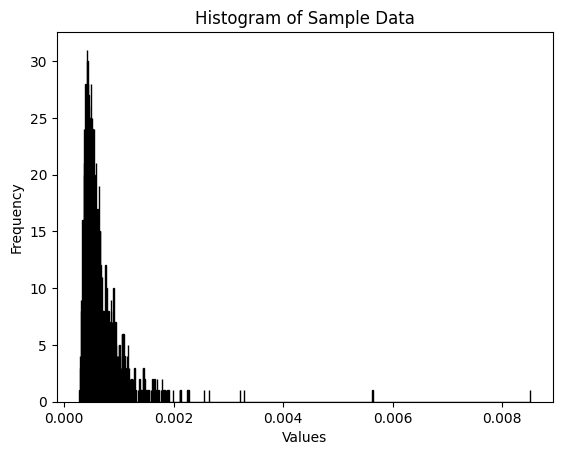

In [110]:
data = np.array(X_train.toarray())
var =  np.var(data,axis = 0)
print(np.var(data,axis = 0))
print(np.min(np.var(data,axis = 0)))
print(np.max(np.var(data,axis = 0)))
print(np.average(np.var(data,axis = 0)))
print(np.var(np.var(data,axis = 0)))

# Create histogram
plt.hist(var, bins=1000, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Show plot
plt.show()

In [163]:
model = LinearSVC(penalty = 'l2', tol = 1e-5, dual = 'auto',C = 0.6)
model.fit(X_train,y_train)
# C = 0.6 for l2
# C  = 1.5 for l1


LinearSVC(C=0.6, dual='auto', tol=1e-05)

In [164]:
y_predict = model.predict(X_test)


In [115]:
model = LinearSVC(penalty = 'l2', tol = 1e-5, dual = 'auto',C = 0.6)
print(cross_val_score(model,X_train,y_train,cv=5))

[0.83666667 0.79666667 0.80333333 0.80666667 0.8       ]


In [124]:
model = LinearSVC(penalty = 'l2', tol = 0.001, dual = False,C = 0.6)
print(cross_val_score(model,X_train,y_train,cv=5))

[0.83666667 0.79666667 0.80333333 0.80666667 0.8       ]


In [150]:
for i in [1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2]:
    model = LinearSVC(penalty='l2',tol = 1e-5,dual ='auto',C = i)
    print(i,'median = ',np.average(cross_val_score(model,X_train,y_train,cv = 15)))

1.4 median =  0.8686666666666665
1.5 median =  0.8686666666666665
1.6 median =  0.8679999999999999
1.7 median =  0.8679999999999999
1.8 median =  0.8686666666666665
1.9 median =  0.8686666666666665
2 median =  0.8693333333333332
2.1 median =  0.8673333333333332
2.2 median =  0.8659999999999999


In [133]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]:
    model = LinearSVC(penalty = 'l2', tol = 1e-5,dual = 'auto',C = i)
    print(i,'=',cross_val_score(model,X_train,y_train,cv=10))

0.1 = [0.80666667 0.80666667 0.85333333 0.81333333 0.81333333 0.84
 0.85333333 0.83333333 0.8        0.77333333]
0.2 = [0.84666667 0.81333333 0.82       0.82666667 0.84666667 0.82666667
 0.84       0.80666667 0.78       0.8       ]
0.3 = [0.84666667 0.83333333 0.81333333 0.84       0.83333333 0.82666667
 0.83333333 0.81333333 0.78666667 0.8       ]
0.4 = [0.84666667 0.82666667 0.81333333 0.83333333 0.82       0.83333333
 0.83333333 0.81333333 0.78666667 0.79333333]
0.5 = [0.84       0.83333333 0.80666667 0.84       0.81333333 0.84
 0.83333333 0.82       0.78       0.79333333]
0.6 = [0.84666667 0.82666667 0.8        0.83333333 0.81333333 0.84
 0.82666667 0.82       0.78666667 0.78666667]
0.7 = [0.86666667 0.81333333 0.79333333 0.82666667 0.81333333 0.83333333
 0.82666667 0.82       0.78666667 0.8       ]
0.8 = [0.85333333 0.81333333 0.79333333 0.83333333 0.80666667 0.83333333
 0.82666667 0.81333333 0.78666667 0.8       ]
0.9 = [0.85333333 0.81333333 0.78666667 0.83333333 0.80666667 0.83

In [166]:
output_file = pd.DataFrame({'Row': range(1,501), 'Label':y_predict})
output_file.to_csv('SVM_16.csv',index = False)